# Crimes Incident Analysis of San Francisco
*by Sagar Agarwal*

## Introduction:

As part of the Course *'Communicating Data Science Results'* by *UW*, we are expected to analyze criminal incident data from Seattle or San Francisco to visualize patterns. 
I will be analyzing the crime rates by time of the day and month. 

## Data:
I have used real crime data from Summer 2014 for city San Francisco.

**San Francisco Data**

[San Francisco Summer 2014 dataset used in this assignment](https://github.com/uwescience/datasci_course_materials/blob/master/assignment6/sanfrancisco_incidents_summer_2014.csv)

[Full San Francisco incident dataset](https://data.sfgov.org/Public-Safety/SFPD-Incidents-from-1-January-2003/tmnf-yvry)

All datasets are provided through their respective cities data portals, all powered by [Socrata](https://www.socrata.com/).



In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [5]:
san_fran = pd.read_csv('sanfrancisco_incidents_summer_2014.csv')
print san_fran.head()

   IncidntNum       Category                      Descript DayOfWeek  \
0   140734311          ARSON            ARSON OF A VEHICLE    Sunday   
1   140736317   NON-CRIMINAL                 LOST PROPERTY    Sunday   
2   146177923  LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO    Sunday   
3   146177531  LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO    Sunday   
4   140734220   NON-CRIMINAL                FOUND PROPERTY    Sunday   

         Date   Time PdDistrict Resolution                    Address  \
0  08/31/2014  23:50    BAYVIEW       NONE  LOOMIS ST / INDUSTRIAL ST   
1  08/31/2014  23:45    MISSION       NONE     400 Block of CASTRO ST   
2  08/31/2014  23:30   SOUTHERN       NONE   1000 Block of MISSION ST   
3  08/31/2014  23:30   RICHMOND       NONE        FULTON ST / 26TH AV   
4  08/31/2014  23:23   RICHMOND       NONE   800 Block of LA PLAYA ST   

            X          Y                               Location  \
0 -122.405647  37.738322  (37.7383221869053, -122.40564699456

## Data Prep:
* Extracting *Month, Hour* from *Date, Time* variables in order to analyze the crimes by month and time of day. I have analysed the time of day in terms of hour of the day. This assumption is made so that counting the number of incidents is done on an hourly scale rather than on a minute scale.

In [6]:
date_stngs = san_fran['Date']
san_fran['Date2'] = pd.Series([pd.to_datetime(date) for date in date_stngs])
san_fran['Month'] = san_fran['Date2'].dt.month
time_stngs = san_fran['Time']
san_fran['Time2'] = pd.Series([pd.to_datetime(time) for time in time_stngs])
san_fran['Hour'] = san_fran['Time2'].dt.hour

* Counting crimes of diferent categories by time of day

In [7]:
san_fran1 = san_fran[['IncidntNum','Hour','Category']]
by_hour = pd.pivot_table(san_fran1, aggfunc='count', index='Hour', columns='Category', )
by_hour = by_hour.fillna(0)

* Counting total number of incidences by time of day

In [8]:
san_fran2 = san_fran[['Hour','Category']]
sum_inci = san_fran2.groupby(['Hour']).count()

* Counting crimes of diferent categories by month

In [9]:
san_fran4 = san_fran[['IncidntNum','Month','Category']]
by_month_inci = pd.pivot_table(san_fran4, aggfunc='count', index='Month', columns='Category', )
by_month_inci = by_month_inci.fillna(0)

* Counting total number of incidences by month

In [17]:
san_fran3= san_fran[['Month','Category']]
by_month = san_fran3.groupby(['Month']).count()

* Changing Column names for better understanding

In [18]:
def change_col(df):
    df.columns = ['ARSON',
     'ASSAULT',
     'BRIBERY',
     'BURGLARY',
     'DISORDERLY CONDUCT',
     'DRIVING UNDER THE INFLUENCE',
     'DRUG/NARCOTIC',
     'DRUNKENNESS',
     'EMBEZZLEMENT',
     'EXTORTION',
     'FAMILY OFFENSES',
     'FORGERY/COUNTERFEITING',
     'FRAUD',
     'GAMBLING',
     'KIDNAPPING',
     'LARCENY/THEFT',
     'LIQUOR LAWS',
     'LOITERING',
     'MISSING PERSON',
     'NON-CRIMINAL',
     'OTHER OFFENSES',
     'PORNOGRAPHY/OBSCENE MAT',
     'PROSTITUTION',
     'ROBBERY',
     'RUNAWAY',
     'SECONDARY CODES',
     'STOLEN PROPERTY',
     'SUICIDE',
     'SUSPICIOUS OCC',
     'TRESPASS',
     'VANDALISM',
     'VEHICLE THEFT',
     'WARRANTS',
     'WEAPON LAWS']
    return df
     
by_hour = change_col(by_hour)
by_month_inci = change_col(by_month_inci)
sum_inci.columns = ['Count of incidents']
by_month.columns = ['Count of incidents']
by_month = by_month.rename(index={6: 'July' , 7: 'Aug' , 8: 'Sept'})

* Counting number of robberies by time of day

In [19]:
rob = by_hour[['ROBBERY']]

## Analysis

* Firstly I wanted to analyze the trend of crimes by the time of the day. 

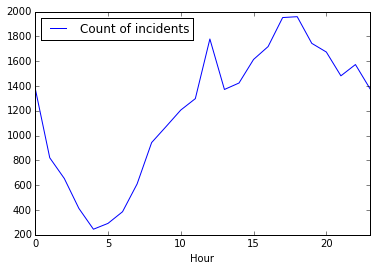

In [20]:
sum_inci.plot(kind ='line')

We see that least crimes are committed between 04:00 to 04:59 then there is a local maxima at 12:00 to 12:59 and the maxima is at 17:00 to 17:59. This shows that crime rate starts to increase from 04:00 till 12:00 then it decreases till 14:00 and again increases till 17:00 finally to start decreasing till 04:00. 

Looking at the individual crime trends by the time of day:

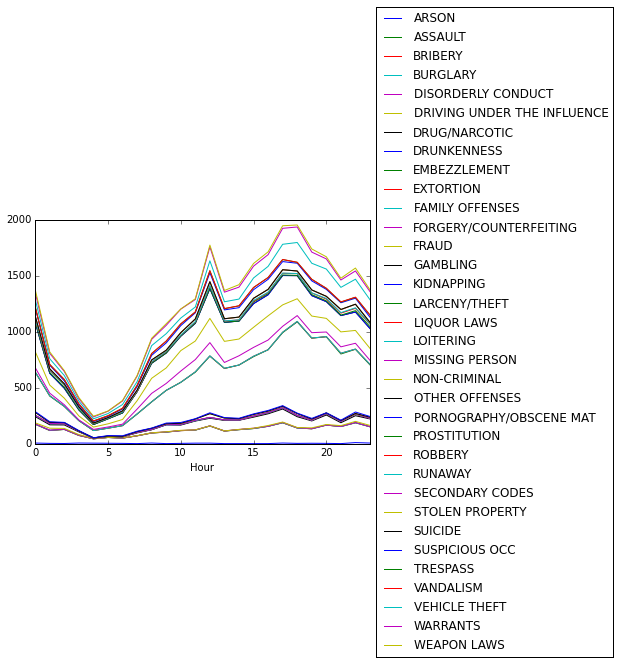

In [21]:
f = plt.figure()
f.subplots_adjust(right=0.8)
by_hour.plot(kind='line',stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

We see that there is a similar trend for all the types of crimes which is that least amount of crimes occur between 04:00 to 06:59 and the maximum crimes occur between 17:00 and 19:59. However there is a local peak at 12:00 as well. This shows that there is a sudden increase in crimes at noon as well.

Looking at robberies alone(for more clarity):

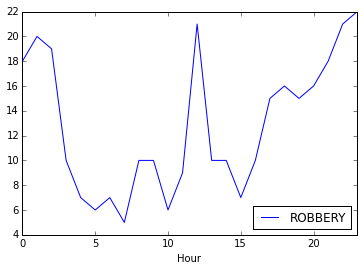

In [22]:
rob.plot(kind = 'line')

* Now analysing the crime rate by month:

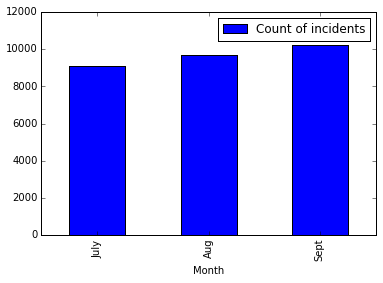

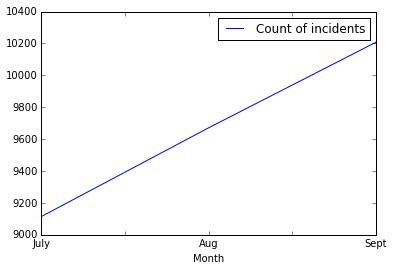

In [23]:
by_month.plot(kind= 'bar')
by_month.plot(kind= 'line')

We see that the crime rates are increasing at a constant rate by the months in San Francisco. Looking at diferent crime incidences by month: 

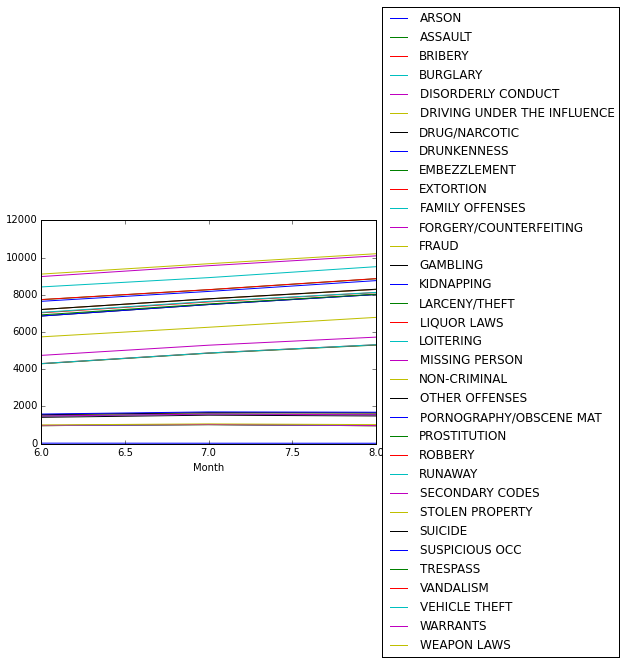

In [25]:
f = plt.figure()
f.subplots_adjust(right=0.8)
by_month_inci.plot(kind='line',stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

We see that no individual crime has decreased. However the more frequent crimes have increased much faster than the less frequent ones. The crimes typeswhich were less the 2000 in number have more or less remained constant. 

## Conclusion:
We see that least crimes are committed between 04:00 to 04:59 then there is a local maxima at 12:00 to 12:59 and the maxima is at 17:00 to 17:59 and crime rates have been increasing constantly as the months are passing predominately the more frequent crimes are increasing faster.
